# Exámen Final Módulo 5 - Joaquín Trejo

El objetivo del examen final es construir un portafolio riesgoso con 7 acciones e invertir en un portafolio completo que maximice tu utilidad.
Considera una tasa libre de riesgo de 5.0%, un premio por riesgo de mercado de 10.0% y un nivel de aversión al riesgo A=3.

Para las 7 acciones seleccionadas, calcula:



## 1.Rendimiento esperado diario y anual bajo los siguientes modelos:

### a. Modelo de rendimiento promedio constante

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels import regression

In [2]:
#Se importa el archivo con los precios diarios (market_data)
#y se genera una matriz con los rendimientos (returns)

market_data = pd.read_excel("Prueba.xlsx", index_col=0)
returns = market_data.pct_change().dropna(axis=0)

In [3]:
#Se limpian los nombres de las columnas
returns.columns =[c.replace(" MF Equity","").replace(" INDEX","") for c in returns.columns]
market_data.columns =[c.replace(" MF Equity","").replace(" INDEX","") for c in market_data.columns]

In [4]:
#Escogemos las 7 acciones y eliminamos el resto de la base
data = returns.copy().drop(['GAPB', 'CEMEXCPO','KOFUBL', 'AC*','FEMSAUBD', 'OMAB', 'GFINBURO','AMXL', 'ALSEA*', 'ORBIA*','RA','BOLSAA', 'LIVEPOLC', 'GENTERA*',
       'IENOVA*', 'CUERVO*', 'ELEKTRA*', 'BBAJIOO', 'ALPEKA', 'MEGACPO',
       'GCC*', 'BIMBOA', 'GMEXICOB', 'GCARSOA1', 'TLEVICPO', 'ALFAA', 'BSMXB',
       'PINFRA*', 'MEXBOL'], axis=1)

In [5]:
data.head()

,KIMBERA,ASURB,GFNORTEO,LABB,PE&OLES*,GRUMAB,WALMEX*
DATE,,,,,,,
2017-06-08,0.021310,-0.010401,-0.013458,0.006852,0.005790,-0.003921,-0.001183
2017-06-09,-0.009016,0.007274,-0.003226,-0.008082,0.014356,0.000290,-0.000710
2017-06-12,0.018196,-0.018617,0.012391,-0.011578,-0.026620,-0.001864,-0.013033
2017-06-13,-0.012254,0.006407,0.007581,-0.003905,0.011344,-0.004399,-0.012725
2017-06-14,0.013699,0.010676,0.001904,0.001307,0.010855,-0.015088,0.025292


In [6]:
#Calculamos los rendimientos diarios y anuales bajo el primer metodo: Rendimientos promedio contantes
rend_ports_diario = data.mean()
rend_ports_anual = data.mean()*252

## Respuesta

El rendimiento promedio constante diario de las acciones del portafolio es de:

In [7]:
print(rend_ports_diario)

KIMBERA     0.000128
ASURB       0.000102
GFNORTEO    0.000193
LABB       -0.000107
PE&OLES*   -0.000769
GRUMAB     -0.000211
WALMEX*     0.000493
dtype: float64


El rendimiento promedio constante anual de las acciones del portafolio es de:

In [8]:
print(rend_ports_anual)

KIMBERA     0.032192
ASURB       0.025599
GFNORTEO    0.048631
LABB       -0.026920
PE&OLES*   -0.193689
GRUMAB     -0.053139
WALMEX*     0.124216
dtype: float64


### b. Modelo CAPM

In [9]:
#Generamos un vector de rendimientos de mercado
indice = returns.copy()[['MEXBOL']]

In [10]:
#Definimos una función que nos generará las alphas y betas

def betas(rendimientos, indice,tlr):
    betas = []
    y = sm.add_constant(indice.iloc[:,-1]-(tlr/252))
    y["const"] = y["const"]
    
    for i in rendimientos.columns:
        model = regression.linear_model.OLS(rendimientos[i]-(tlr/252),y).fit()
        betas.append(model.params[1])
    return betas 

In [11]:
#Considerando una Tasa Libre de Riesgo (tlr) de 5%
#y un premio por riesgo de mercado del (prm) 10%

tlr0 = 0.05
prm0 = .10

#Al ser anuales, debemos transformalas a diarias
tlr = tlr0/252
prm = prm0/252

In [12]:
#Calculamos las betas
betas = betas(data,indice,tlr)

/Users/joaquinguillermotrejoberriel/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
#Generamos un Pandas Data Frame para concentrar los resultados
clasificacion = pd.DataFrame(zip(list(data.columns.values),betas),
                                  columns =['Emisora','Beta'])

In [14]:
clasificacion["Clasificación"] = np.where(clasificacion['Beta']>1, 'Agresiva', 'Defensiva')
clasificacion["Rendimiento esperado diario"] = (tlr) + clasificacion["Beta"]*(prm)
clasificacion["Rendimiento esperado anual"] = clasificacion["Rendimiento esperado diario"]*252

   i. ¿Cuál es la beta de cada acción?
   
   ii.Clasifica las acciones en defensivas y agresiva
   
   
## Respuesta

In [15]:
clasificacion

,Emisora,Beta,Clasificación,Rendimiento esperado diario,Rendimiento esperado anual
0,KIMBERA,0.834251,Defensiva,0.000529,0.133425
1,ASURB,0.942466,Defensiva,0.000572,0.144247
2,GFNORTEO,1.595640,Agresiva,0.000832,0.209564
3,LABB,0.867114,Defensiva,0.000543,0.136711
4,PE&OLES*,1.203287,Agresiva,0.000676,0.170329
5,GRUMAB,0.627485,Defensiva,0.000447,0.112748
6,WALMEX*,0.884332,Defensiva,0.000549,0.138433




## 2. Matriz varianza - covarianza:

## Respuesta

In [16]:
data.cov()

,KIMBERA,ASURB,GFNORTEO,LABB,PE&OLES*,GRUMAB,WALMEX*
KIMBERA,0.000251,0.000053,0.000070,0.000079,0.000085,0.000037,0.000051
ASURB,0.000053,0.000229,0.000095,0.000056,0.000085,0.000037,0.000042
GFNORTEO,0.000070,0.000095,0.000381,0.000097,0.000127,0.000062,0.000089
LABB,0.000079,0.000056,0.000097,0.000434,0.000092,0.000041,0.000057
PE&OLES*,0.000085,0.000085,0.000127,0.000092,0.000459,0.000066,0.000047
GRUMAB,0.000037,0.000037,0.000062,0.000041,0.000066,0.000177,0.000051
WALMEX*,0.000051,0.000042,0.000089,0.000057,0.000047,0.000051,0.000219


Utilizando los rendimientos esperados bajo el modelo CAPM, construye:

## 3.Frontera de carteras de mínima varianza y frontera eficiente / graficar

In [17]:
#Ahora se definen 2 funciones que servirán para el calculo del rendimiento (port_rend) y volatilidad (port_vol) anuales

rends = clasificacion['Rendimiento esperado diario']

def port_rend(weights,r):
    E_p = (rends* weights).sum()*252
    return E_p

def port_vol(weights,r):
    S_p = np.sqrt(weights.T @ (r.cov()*252)@weights)
    return S_p

In [18]:
#Ahora vamos a generar portafolios simulados, para lo cual debemos generar una matriz de "Nùmero de portafolios a simular"x"Nùmero de acciones en el portafiolio"

weights_sim = np.random.random((5000,7))
weights_sim = weights_sim / weights_sim.sum(axis=1,keepdims=True)
weights_sim

array([[0.10936607, 0.06359602, 0.18187597, ..., 0.11017708, 0.20196105,
        0.16923817],
       [0.09046678, 0.23535238, 0.02999353, ..., 0.21048503, 0.04607206,
        0.23957974],
       [0.0977076 , 0.04889157, 0.14384941, ..., 0.30627583, 0.14870882,
        0.17615459],
       ...,
       [0.2327881 , 0.03587008, 0.22781316, ..., 0.12831351, 0.15333877,
        0.17476059],
       [0.09401519, 0.18839109, 0.03883181, ..., 0.01700982, 0.14512593,
        0.25338781],
       [0.39693543, 0.1098157 , 0.10027407, ..., 0.10406578, 0.25414592,
        0.03437425]])

In [19]:
#Aplicamos las funciones "port_rend" y "port vol" a toda la matriz de rendimientos
rend_sim = np.apply_along_axis(port_rend,1,weights_sim,r=data)
vol_sim = np.apply_along_axis(port_vol,1,weights_sim,r=data)

In [20]:
#Generamos un vector que contenga el sharpe ratio para cada escenario simulado

sharpe_ratio = rend_sim / vol_sim

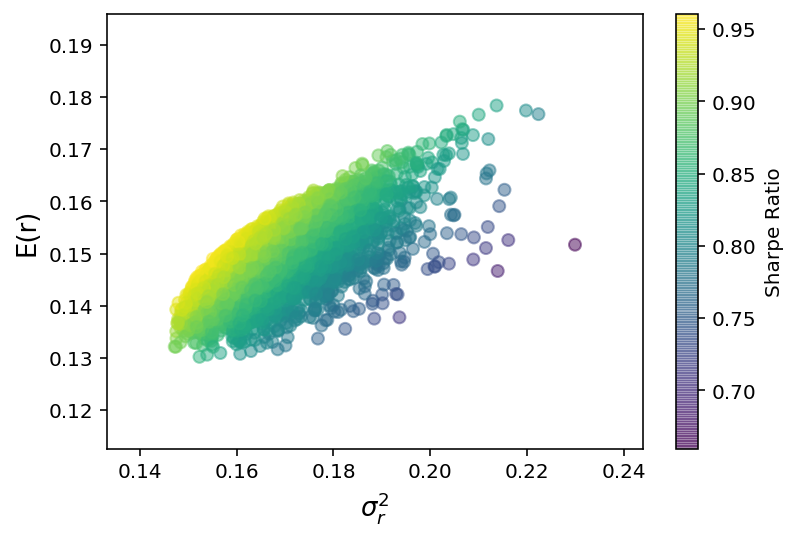

In [21]:
#Graficamos el conjunto de portafolio simulados, relacionados con su rendimiento y volatilidad
%config InlineBackend.figure_format='retina'
plt.scatter(vol_sim,rend_sim, c=sharpe_ratio,alpha=.5)
plt.colorbar(label="Sharpe Ratio",)
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)",fontsize=13);

In [22]:
#Ahora definimos las funciones que utilizaremos para los contraints de la optimizaciòn

def sum_weights(weights):
    return weights.sum()-1

def rend_esperado(weights, E):
    return port_rend(weights, data) - E

In [23]:
from scipy.optimize import minimize

In [24]:
N, M = data.shape
w0 = np.random.randn(M)


constraints = [
    {"type": "eq", "fun":sum_weights}
    
]
port0 = minimize(port_vol, w0,  constraints = constraints, args=data)

In [25]:
port0

     fun: 0.14563862022171575
     jac: array([0.14552162, 0.14586493, 0.14500357, 0.14556271, 0.14544257,
       0.14558274, 0.14567858])
 message: 'Optimization terminated successfully.'
    nfev: 118
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.16832559, 0.20880545, 0.01120884, 0.07148654, 0.03096549,
       0.30561167, 0.20359643])

In [26]:
wp0 = port0.x
port_rend(wp0,data),port_vol(wp0,data)

(0.1326164050466698, 0.14563862022171575)

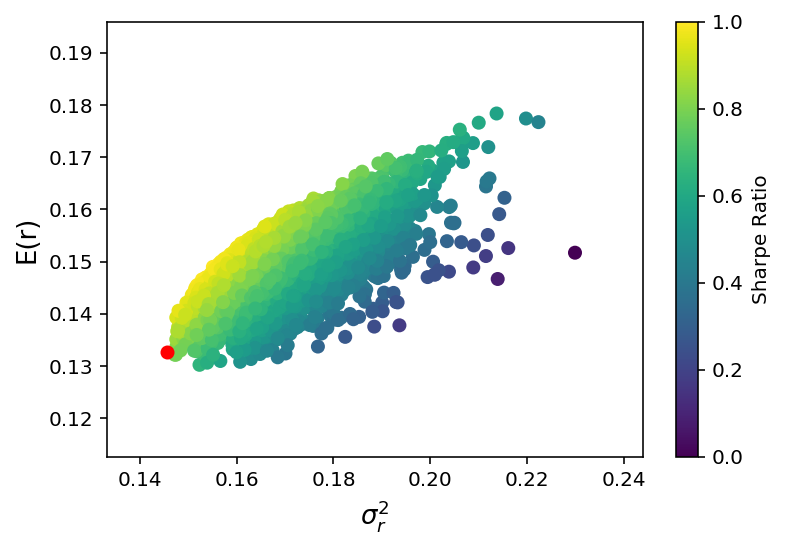

In [27]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim,rend_sim,c=sharpe_ratio)
plt.scatter(port_vol(wp0,data),port_rend(wp0,data),c="red")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)",fontsize=13,);

In [28]:
#Ahora vamos a definir un rango sobre el cual podamos genrar la frontera, tomando como lìmites los rendimeintos mínimos y máximos del portafolio inicial

rmin = port_rend(wp0,data)
rmax = rend_sim.max()
rend_maxs = np.linspace(rmin,rmax)
rend_maxs

array([0.13261641, 0.13355013, 0.13448386, 0.13541759, 0.13635132,
       0.13728505, 0.13821878, 0.13915251, 0.14008624, 0.14101997,
       0.1419537 , 0.14288743, 0.14382115, 0.14475488, 0.14568861,
       0.14662234, 0.14755607, 0.1484898 , 0.14942353, 0.15035726,
       0.15129099, 0.15222472, 0.15315845, 0.15409218, 0.1550259 ,
       0.15595963, 0.15689336, 0.15782709, 0.15876082, 0.15969455,
       0.16062828, 0.16156201, 0.16249574, 0.16342947, 0.1643632 ,
       0.16529693, 0.16623065, 0.16716438, 0.16809811, 0.16903184,
       0.16996557, 0.1708993 , 0.17183303, 0.17276676, 0.17370049,
       0.17463422, 0.17556795, 0.17650168, 0.1774354 , 0.17836913])

In [29]:
#Vamos a generar la frontera eficiente para un portafolio de mìnima volatilidad,obteniendo los pesos óptimos sobre todo el intervalo de rend_maxs

pesos_optimos = []
N, M = data.shape
w_opt = np.random.randn(M)

for e in rend_maxs:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w_opt: rend_esperado(w_opt,e)},
    ]

    
    port_opt = minimize(port_vol, w_opt,  constraints = constraints, args=data)
    w_opt = port_opt.x
    pesos_optimos.append(w_opt)

## Respuesta

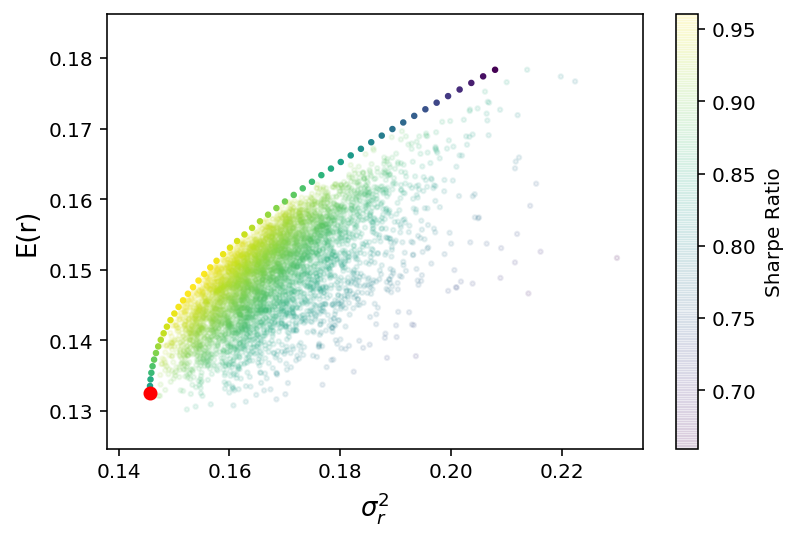

In [30]:
r_opt = []
v_opt = []

for w in pesos_optimos:
    r_opt.append(port_rend(w,data))
    v_opt.append(port_vol(w,data))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt,r_opt, c= r_opt/v_opt,s=5)
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio, alpha = 0.1, s=5)
plt.colorbar(label="Sharpe Ratio",)
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)",fontsize=13);
plt.scatter(port_vol(wp0,data),port_rend(wp0,data),c="red")

In [54]:
print("Portafolio riesgo óptimo")
portafolio_riesgoso_opt 

Portafolio riesgo óptimo


,Emisora,Peso (%)
0,KIMBERA,12.920249
1,ASURB,18.618745
2,GFNORTEO,25.220515
3,LABB,4.437809
4,PE&OLES*,9.515317
5,GRUMAB,10.780691
6,WALMEX*,18.506675


## 4. Encuentra el portafolio riesgoso óptimo (maximiza el coeficiente de Sharpe)

## Respuesta

In [31]:
def min_func_sharpe(weights):
    return - (port_rend(weights, data) - tlr0)/(port_vol(weights,data))

constraints2 = [
    {"type": "eq","fun":sum_weights}
]

f_sharpe = minimize(min_func_sharpe,w0, constraints = constraints2)
w_sharpe = f_sharpe.x
e_sharpe = port_rend(w_sharpe,data)
vol_sharpe = port_vol(w_sharpe, data)

sigma_c = np.linspace(.125,0.25)
sharpe = tlr0 + sigma_c * (e_sharpe - tlr0) / (vol_sharpe)

## 5.Elige los porcentajes a invertir en el portafolio riesgoso óptimo y el activo libre de riesgo

In [32]:
portafolio_riesgoso_opt = pd.DataFrame(zip(list(data.columns.values),w_sharpe*100),columns =['Emisora','Peso (%)'])

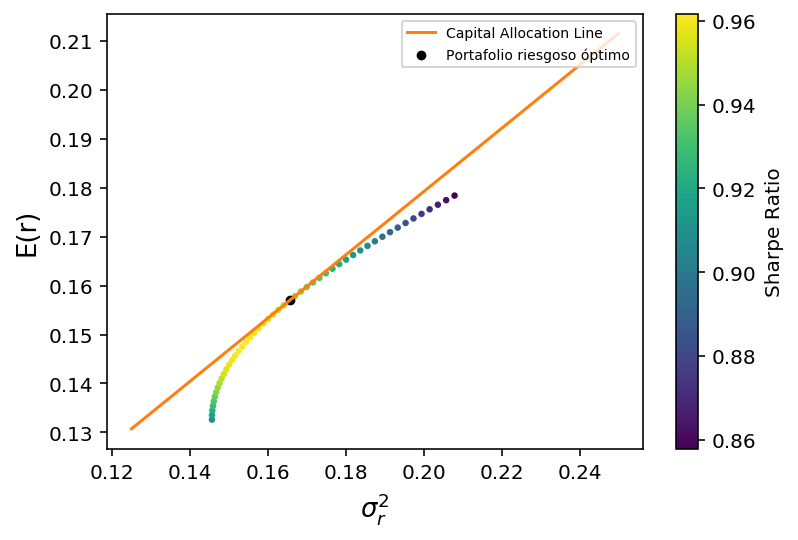

In [33]:
plt.plot(sigma_c,sharpe, linestyle = "-", c= "tab:orange",label = "Capital Allocation Line")
plt.scatter(v_opt,r_opt, c= r_opt/v_opt,s=5)
#plt.scatter(vol_sim, rend_sim, c=sharpe_ratio, alpha = 0.1, s=5)
plt.colorbar(label="Sharpe Ratio",)
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)",fontsize=13);
plt.scatter(port_vol(w_sharpe,data),port_rend(w_sharpe,data),c="black",label="Portafolio riesgoso óptimo",s=15)
plt.legend(fontsize=7, loc ='upper right' );

## Respuesta

Considerando que se asignará un peso gamma al portafolio riesgoso y un peso de (1-gamma) asignado al activo libre de riesgo.

En este punto consideramos el nivel de riesgo A=3.

In [55]:
A=3
gamma = (port_rend(w_sharpe,data)-tlr0)/(A*port_vol(w_sharpe,data))*100

In [56]:
print(f"Para el portafolio riesgoso, se aisgnará un porcentage de {gamma:0.3}%")
print(f"Para el activo libre de riesgo, se aisgnará un porcentage de {100-gamma:0.3}%")

Para el portafolio riesgoso, se aisgnará un porcentage de 21.5%
Para el activo libre de riesgo, se aisgnará un porcentage de 78.5%


## Deep learning

## 6. ¿En qué escenarios ocuparías una red neuronal?

* Para reconocimiento de imágenes.
* Problemas de regresión
* Problemas de clasificaciòn.
* Problemas de interpretaciòn de texto.

Lo anterior siempre y cuando se cuente con una buena cantidad de información.

## 7.¿En qué escenarios no ocuparías una red neuronal?

* Cuando no se tiene suficiente informaciòn.
* Cuando se tiene una base de información lo suficientemente deifnida, clasificada, etc, que no se requiere entrenar modelo alguno.
* Cuando se trata de la generaciòn de calculos cerrados como precio de un bono, cálculo de IMC, càlculo del área de un polígono. 

## 8. Menciona tres funciones de activación para una red neuronal feed-forward

1. Lineal
2. Tanh
3. Sigmoidal


## 9. ¿Qué es el método de backpropagation?

Es un método para evaluar el gradiente de una función de error para una red multi-layer, mediante el cual la información que se intercambia entre layers y neuronas puede ir hacia adelante y hacia atrás (funcionar como input y output).

A través de este método se entrena una red neural (multi-layer) mediante la aplicación de gradient descent aplicado a una función MSE.

## 10. ¿En qué difiere una red neuronal feed - forward de una red neuronal convolucional?

En una red feed-forward, las neuronas solo estan conectadas con el layer siguiente, es decir no son recursivas o no funcionan como input para las neuronas del layer previo.